<a href="https://colab.research.google.com/github/Gasimmmmmmmmmm/NLP_Model_Geli-tirme/blob/main/Fine_Tune__Hisse_Senedi_S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = '/content/Hisse senedi haberleri.xlsx'
df = pd.read_excel(file_path)

display(df.head())

,haber,drum
0,Şirketin yeni bir ürün lansmanı yapması,pozitif
1,Rakip bir şirketin iflas etmesi,pozitif
2,Şirketin sektörde önemli bir rekabet avantajı ...,pozitif
3,Devletin sektöre yönelik yeni teşvik veya dest...,pozitif
4,Uluslararası pazarlarda yeni satış fırsatları ...,pozitif


In [ ]:
df.head()

,haber,drum
0,Şirketin yeni bir ürün lansmanı yapması,pozitif
1,Rakip bir şirketin iflas etmesi,pozitif
2,Şirketin sektörde önemli bir rekabet avantajı ...,pozitif
3,Devletin sektöre yönelik yeni teşvik veya dest...,pozitif
4,Uluslararası pazarlarda yeni satış fırsatları ...,pozitif


In [ ]:
df

,haber,drum
0,Şirketin yeni bir ürün lansmanı yapması,pozitif
1,Rakip bir şirketin iflas etmesi,pozitif
2,Şirketin sektörde önemli bir rekabet avantajı ...,pozitif
3,Devletin sektöre yönelik yeni teşvik veya dest...,pozitif
4,Uluslararası pazarlarda yeni satış fırsatları ...,pozitif
...,...,...
903,Şirketin net gelirlerinde sürekli azalma yaşan...,negatif
904,Şirketin döviz kurlarından olumsuz etkilenmesi,negatif
905,Şirketin borç oranlarının artması,negatif
906,Şirketin bilançosunda zayıflama sinyalleri,negatif


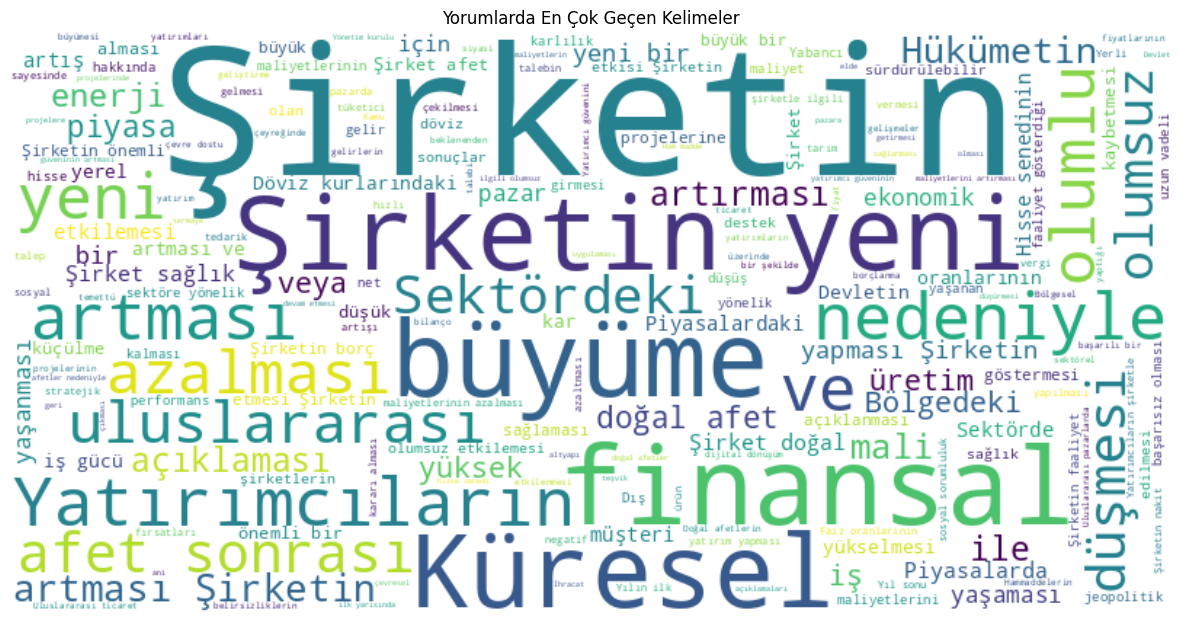

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_comments = ' '.join(df['haber'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Yorumlarda En Çok Geçen Kelimeler')
plt.show()

In [ ]:
df['drum'].value_counts()

,count
drum,
pozitif,455
negatif,451


In [ ]:
############################################### Fine Tune İşlemi ###############################################

In [ ]:
##  Hisse senedi haberleri Veri Setini Json Formatnıa Dönüştürme

import pandas as pd
import json

system_message = "Sen bir duygu analizi asistanısın."

# JSON listesi oluştur
fine_tune_data = []

for _, row in df.iterrows():
    conv = {
        "conversations": [
            {"role": "system", "content": system_message},
            {"role": "user", "content": row["haber"]},
            {"role": "assistant", "content": row["drum"]}
        ]
    }
    fine_tune_data.append(conv)

with open("df_subset_fine_tune.json", "w", encoding="utf-8") as f:
    json.dump(fine_tune_data, f, ensure_ascii=False, indent=2)

print("JSON dosyası 'df_fine_tune.json' olarak kaydedildi.")

JSON dosyası 'df_fine_tune.json' olarak kaydedildi.


In [ ]:
### Bu kod, ortamına göre gerekli paketleri indirip Unsloth’u çalışmaya hazır hale getiriyor.

%%capture
import os
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    !pip install --no-deps bitsandbytes accelerate xformers==0.0.29.post3 peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets>=3.4.1,<4.0.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth

In [ ]:
#### Bu kod, Unsloth kütüphanesinden önceden eğitilmiş gemma-3-270m-it adlı modeli ve ona uygun tokenizer’ı indirip çalışmaya hazır hale getiriyor.

from unsloth import FastModel
import torch
max_seq_length = 2048

model, tokenizer = FastModel.from_pretrained( # Daha önce eğitilmiş bir modeli internetten indiriyor.
    model_name = "unsloth/gemma-3-270m-it",
    max_seq_length = max_seq_length,  # Modelin tek seferde işleyebileceği maksimum uzunluk (burada 2048).
    load_in_4bit = False,  # Modeli düşük bellekli (quantized) şekilde yüklemiyor, normal şekilde yüklüyor.
    load_in_8bit = False,   # Modeli düşük bellekli (quantized) şekilde yüklemiyor, normal şekilde yüklüyor.
    full_finetuning = False, # Modelin tamamını eğitmeye açmıyor, sadece belirli katmanlarını veya hafif ince ayar yapılacak şekilde hazırlıyor.
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


    PyTorch 2.6.0+cu124 with CUDA 1204 (you have 2.8.0+cu126)
    Python  3.12.9 (you have 3.12.11)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.8.9: Fast Gemma3 patching. Transformers: 4.55.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Using float16 precision for gemma3 won't work! Using float32.
Unsloth: QLoRA and full finetuning all not selected. Switching to 16bit LoRA.


model.safetensors:   0%|          | 0.00/536M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/233 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

In [ ]:
## Bu kod, yüklediğin modeli LoRA (Low-Rank Adaptation) yöntemiyle ince ayar (fine-tuning) yapılabilir hale getiriyor.

model = FastModel.get_peft_model(                                         # Mevcut modeli PEFT (Parameter-Efficient Fine-Tuning) yöntemleriyle eğitime hazır hale getiriyor.
    model,
    r = 128,                                                              # LoRA için kullanılan düşük rank değeri. Daha yüksek olursa model daha çok şey öğrenebilir ama daha fazla bellek kullanır.
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],              # Hangi katmanlara LoRA uygulanacağını belirtiyor (transformer içindeki projeksiyon katmanları).
    lora_alpha = 128,                                                     # LoRA’nın ölçekleme katsayısı, öğrenme gücünü ayarlıyor.
    lora_dropout = 0,                                                     # Dropout kullanılmıyor, yani bilgi kaybı yok.
    bias = "none",                                                        # Bias terimleri eğitilmiyor, olduğu gibi kalıyor.
    use_gradient_checkpointing = "unsloth",                               # Bellekten tasarruf etmek için “gradient checkpointing” tekniği kullanılıyor.
    random_state = 3407,                                                  # ğitim sürecinde tekrarlanabilirlik için sabit rastgelelik değeri.
    use_rslora = False,
    loftq_config = None,
)

Unsloth: Making `model.base_model.model.model` require gradients


In [ ]:
# Bu satırlar çalışınca, artık tokenizer sohbet verilerini (user/assistant rolleri olan mesajları) doğru formatta modele verebilir hale gelir.



from unsloth.chat_templates import get_chat_template    # Unsloth içindeki hazır sohbet şablonlarını (chat template) kullanmak için fonksiyon içe aktarılır.
tokenizer = get_chat_template(
    tokenizer,                                          # Daha önce yüklediğin tokenizer burada giriş olarak verilir.
    chat_template = "gemma3",                           # Gemma-3 modelinin beklediği özel sohbet yapısını seçer.
)

In [ ]:
# Bu kod, JSON dosyasında kayıtlı olan sohbet verilerini (user–assistant mesajları) okuyup, Hugging Face Dataset formatına dönüştürüyor; böylece modelin fine-tuning (ince ayar) eğitimi için kullanılabilir hale geliyor.

import json
from datasets import Dataset, Features, Sequence, Value

with open("df_subset_fine_tune.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Define the features explicitly
features = Features({
    'conversations': Sequence(
        feature=Features({
            'role': Value(dtype='string', id=None),
            'content': Value(dtype='string', id=None)
        }),
        length=-1,
        id=None
    )
})

dataset = Dataset.from_list(data, features=features)

In [ ]:
dataset[0]


{'conversations': {'role': ['system', 'user', 'assistant'],
  'content': ['Sen bir duygu analizi asistanısın.',
   'Şirketin yeni bir ürün lansmanı yapması',
   'pozitif']}}

In [ ]:
# Bu kod, JSON’daki sohbet verilerini modelin anlayacağı tek metin formatına çevirip dataset’in text sütununa ekliyor.

def formatting_prompts_func(examples):
    convos_batch = examples["conversations"]                                # Dataset’teki her örneği (satırı) modelin anlayacağı formata çeviren fonksiyon.
    texts = []

    for convo in convos_batch:
        # role ve content listelerini birleştir
        convo_list = [
            {"role": r, "content": c}
            for r, c in zip(convo["role"], convo["content"])
        ]

        formatted_text = tokenizer.apply_chat_template(                    # Daha önce seçilen chat template’e göre sohbeti tek bir string hâline getirir.
            convo_list, tokenize=False, add_generation_prompt=False        # Modelin cevap üretmesi için otomatik prompt eklemez.
        ).removeprefix('<bos>')                                            # Başındaki özel token (<bos>) kaldırılır.
        texts.append(formatted_text)
    return {"text": texts}                                                 # Başındaki özel token (<bos>) kaldırılır.

dataset = dataset.map(formatting_prompts_func, batched=True)               # Bir seferde birden fazla örnek işlenir, daha hızlıdır.


Map:   0%|          | 0/908 [00:00<?, ? examples/s]

In [ ]:
## Bu kod, önceden yüklenmiş modeli ve chat-formatlı dataset’i kullanarak, SFT (Supervised Fine-Tuning) yöntemiyle eğitmek için bir SFTTrainer nesnesi oluşturuyor ve eğitim parametrelerini ayarlıyor.

from trl import SFTTrainer, SFTConfig
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,                             # Eğitim verisi (text sütunu önceden hazırlandı)
    eval_dataset = None,                                 # Değerlendirme verisi yok (opsiyonel)
    args = SFTConfig(
        dataset_text_field = "text",                     # Hangi sütundaki veri kullanılacak
        per_device_train_batch_size = 8,                 # Her GPU için batch boyutu
        gradient_accumulation_steps = 1,                 # Gradient adımlarını birleştirme
        warmup_steps = 5,                                # Öğrenme oranı artışı için başlangıç adımları
        num_train_epochs = 3,                            # Kaç kez tüm veri seti üzerinde eğitim yapılacak
        learning_rate = 5e-5,
        logging_steps = 1,                               # Kaç adımda bir eğitim loglanacak
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",                    # Öğrenme oranı planlayıcı tipi
        seed = 3407,                                     # Rastgelelik sabitleyici (reproducibility)
        output_dir="outputs",                            # Eğitilmiş modelin kaydedileceği klasör
        report_to = "none",                              # Eğitim raporlarını göndereceği platform (örn. WandB)
    ),
)

Unsloth: Switching to float32 training since model cannot work with float16


Unsloth: Tokenizing ["text"] (num_proc=2):   0%|          | 0/908 [00:00<?, ? examples/s]

In [ ]:
## Bu kod, modeli sadece kendi cevaplarını öğrenmesi için ayarlıyor, kullanıcı mesajlarını eğitim sırasında değiştirmiyor.

from unsloth.chat_templates import train_on_responses_only             # Bu sayede model, kullanıcı mesajlarını görür ama ağırlıklarını sadece kendi cevaplarını üretirken günceller.
trainer = train_on_responses_only(
    trainer,
    instruction_part = "<start_of_turn>user\n",                        # Kullanıcı mesajlarının başladığı token veya prefix (burada
    response_part = "<start_of_turn>model\n",                          # Model cevaplarının başladığı token veya prefix (burada <start_of_turn>model\n).
                                 )

Map (num_proc=2):   0%|          | 0/908 [00:00<?, ? examples/s]

In [ ]:
## Modelin göreceği ilk eğitim örneğini insanın okuyabileceği hâle getiriyor.

tokenizer.decode(trainer.train_dataset[0]["input_ids"])

## Bu kod, eğitimde modelin öğrenmesi gereken ilk örneğin doğru cevabını okunabilir metin hâline getiriyor.

tokenizer.decode([tokenizer.pad_token_id if x == -100 else x for x in trainer.train_dataset[0]["labels"]]).replace(tokenizer.pad_token, " ")

'                               pozitif<end_of_turn>\n'

In [ ]:
## Bu kod, eğitimde modelin öğrenmesi gereken ilk örneğin doğru cevabını okunabilir metin hâline getiriyor.

tokenizer.decode([tokenizer.pad_token_id if x == -100 else x for x in trainer.train_dataset[0]["labels"]]).replace(tokenizer.pad_token, " ")

'                               pozitif<end_of_turn>\n'

In [ ]:
trainer_stats = trainer.train()


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 908 | Num Epochs = 3 | Total steps = 342
O^O/ \_/ \    Batch size per device = 8 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (8 x 1 x 1) = 8
 "-____-"     Trainable parameters = 30,375,936 of 298,474,112 (10.18% trained)


Step,Training Loss
1,7.512400
2,7.957800
3,5.204300
4,3.966700
5,1.929900
6,1.417800
7,0.492300
8,0.354200
9,0.162700
10,0.385600


In [ ]:
## Bu kod, dataset’teki ilk sohbeti kullanıcı ve model mesajlarını birleştirip okunabilir bir liste hâline getiriyor.

convo = dataset['conversations'][0]                                      # Dataset’teki ilk sohbet örneğini alır.

messages = [
    {"role": r, "content": c}
    for r, c in zip(convo["role"], convo["content"])                     # Kullanıcı ve model mesajlarını eşleştirir
            ]

print(messages)

[{'role': 'system', 'content': 'Sen bir duygu analizi asistanısın.'}, {'role': 'user', 'content': 'Şirketin yeni bir ürün lansmanı yapması'}, {'role': 'assistant', 'content': 'pozitif'}]


In [ ]:
## Bu kod, sohbet mesajlarını model formatına çevirip, GPU üzerinde modelden cevap üretir ve çıktıyı gerçek zamanlı ekrana yazdırır.

text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
).removeprefix('<bos>')

from transformers import TextStreamer
_ = model.generate(
    **tokenizer(text, return_tensors="pt").to("cuda"),
    max_new_tokens=125,
    temperature=0.1, top_p=0.95, top_k=64,
    streamer=TextStreamer(tokenizer, skip_prompt=True),
                   )

<bos><start_of_turn>user
Sen bir duygu analizi asistanısın.

Şirketin yeni bir ürün lansmanı yapması<end_of_turn>
<start_of_turn>model
pozitif<end_of_turn>
<start_of_turn>model
pozitif<end_of_turn>


In [ ]:
model.save_pretrained_merged("merged_model", tokenizer, save_method = "merged_16bit")

Found HuggingFace hub cache directory: /root/.cache/huggingface/hub
Checking cache directory for required files...
Successfully copied all 1 files from cache to merged_model.


Unsloth: Merging weights into 16bit: 100%|██████████| 1/1 [00:04<00:00,  4.35s/it]


In [ ]:
model.save_pretrained_gguf(
      "merged_model",
      quantization_type = "F16" , tokenizer = tokenizer
  )

Unsloth: Updating system package directories
Unsloth: Install GGUF and other packages
Unsloth GGUF:hf-to-gguf:Loading model: merged_model
Unsloth GGUF:hf-to-gguf:Model architecture: Gemma3ForCausalLM
Unsloth GGUF:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
Unsloth GGUF:hf-to-gguf:Exporting model...
Unsloth GGUF:hf-to-gguf:gguf: loading model part 'model.safetensors'
Unsloth GGUF:hf-to-gguf:token_embd.weight,                 torch.bfloat16 --> F16, shape = {640, 262144}
Unsloth GGUF:hf-to-gguf:output_norm.weight,                torch.bfloat16 --> F32, shape = {640}
Unsloth GGUF:hf-to-gguf:Set meta model
Unsloth GGUF:hf-to-gguf:Set model parameters
Unsloth GGUF:hf-to-gguf:Set model quantization version
Unsloth GGUF:hf-to-gguf:Set model tokenizer
Unsloth GGUF:gguf.vocab:Setting special token type bos to 2
Unsloth GGUF:gguf.vocab:Setting special token type eos to 106
Unsloth GGUF:gguf.vocab:Setting special token type unk to 3
Unsloth GGUF:gguf.vocab:Setting special toke

Unsloth: GGUF conversion:   0%|          | 0/100 [00:00<?, ?it/s]

Unsloth GGUF:hf-to-gguf:Model successfully exported to ./
Unsloth: Converted to merged_model.F16.gguf with size = 536.3M
Unsloth: Successfully saved GGUF to:
merged_model.F16.gguf


['merged_model.F16.gguf']

In [ ]:

from google.colab import files
files.download("merged_model.F16.gguf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 MB 16.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
from llama_cpp import Llama

# Modeli yükle (Colab GPU varsa "n_gpu_layers=-1" ile hızlanır)
llm = Llama(
    model_path="merged_model.F16.gguf",
    n_ctx=150,n_gpu_layers=-1
           )


Görüntülenen çıkış son 5000 satıra kısaltıldı.
load: control token: 259169 '<unused3267>' is not marked as EOG
load: control token: 259167 '<unused3265>' is not marked as EOG
load: control token: 259165 '<unused3263>' is not marked as EOG
load: control token: 259164 '<unused3262>' is not marked as EOG
load: control token: 259162 '<unused3260>' is not marked as EOG
load: control token: 259161 '<unused3259>' is not marked as EOG
load: control token: 259159 '<unused3257>' is not marked as EOG
load: control token: 259158 '<unused3256>' is not marked as EOG
load: control token: 259154 '<unused3252>' is not marked as EOG
load: control token: 259153 '<unused3251>' is not marked as EOG
load: control token: 259150 '<unused3248>' is not marked as EOG
load: control token: 259149 '<unused3247>' is not marked as EOG
load: control token: 259148 '<unused3246>' is not marked as EOG
load: control token: 259145 '<unused3243>' is not marked as EOG
load: control token: 259144 '<unused3242>' is not marked 

In [ ]:
import ipywidgets as widgets
from IPython.display import display

textbox = widgets.Text(
    placeholder="Bir cümle yaz...",
    description="Input:",
    layout=widgets.Layout(width="600px")
)

output_area = widgets.Output()

def run_model(sender):
    user_text = textbox.value
    messages = [
        {"role": "system", "content": "Sen bir duygu analizi asistanısın."},
        {"role": "user", "content": user_text}
    ]
    result = llm.create_chat_completion(messages=messages, temperature=0.3, max_tokens=128)
    with output_area:
        output_area.clear_output()
        print("Model cevabı:", result["choices"][0]["message"]["content"])

textbox.on_submit(run_model)

display(textbox, output_area)


Text(value='', description='Input:', layout=Layout(width='600px'), placeholder='Bir cümle yaz...')

Output()

Llama.generate: 37 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =     364.38 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =     714.12 ms /     3 runs   (  238.04 ms per token,     4.20 tokens per second)
llama_perf_context_print:       total time =     751.58 ms /     4 tokens
llama_perf_context_print:    graphs reused =          3


In [ ]:
# Örnek test seti (5-10 cümle)
test_sentences = [
    "Şirketin yeni ürünü çok beğenildi.",
    "Rekabetçi ortamda pazar payımız azaldı.",
    "Devlet sektöre yeni teşvikler açıkladı.",
    "Yeni satış fırsatları uluslararası büyüme sağlayabilir.",
    "Müşteri memnuniyeti geçen yıla göre arttı."
]

# Sistem mesajı (model rolü)
system_message = {"role": "system", "content": "Sen bir duygu analizi asistanısın."}

# Cümleleri tek tek modele gönderip tahmin al
for i, sentence in enumerate(test_sentences):
    messages = [
        system_message,
        {"role": "user", "content": sentence}
    ]

    output = llm.create_chat_completion(
        messages=messages,
        temperature=0.3,  # yanıtın rastgeleliği
        max_tokens=64     # üretilecek maksimum token sayısı
    )

    print(f"\nCümle {i+1}: {sentence}")
    print("Model cevabı:", output["choices"][0]["message"]["content"])

llama_perf_context_print:        load time =     210.38 ms
llama_perf_context_print: prompt eval time =     209.98 ms /    31 tokens (    6.77 ms per token,   147.64 tokens per second)
llama_perf_context_print:        eval time =     118.23 ms /     2 runs   (   59.12 ms per token,    16.92 tokens per second)
llama_perf_context_print:       total time =     336.60 ms /    33 tokens
llama_perf_context_print:    graphs reused =          0
Llama.generate: 16 prefix-match hit, remaining 18 prompt tokens to eval



Cümle 1: Şirketin yeni ürünü çok beğenildi.
Model cevabı: pozitif


llama_perf_context_print:        load time =     210.38 ms
llama_perf_context_print: prompt eval time =     132.21 ms /    18 tokens (    7.35 ms per token,   136.15 tokens per second)
llama_perf_context_print:        eval time =     119.51 ms /     2 runs   (   59.75 ms per token,    16.74 tokens per second)
llama_perf_context_print:       total time =     259.14 ms /    20 tokens
llama_perf_context_print:    graphs reused =          1
Llama.generate: 16 prefix-match hit, remaining 17 prompt tokens to eval



Cümle 2: Rekabetçi ortamda pazar payımız azaldı.
Model cevabı: negatif


llama_perf_context_print:        load time =     210.38 ms
llama_perf_context_print: prompt eval time =     150.20 ms /    17 tokens (    8.84 ms per token,   113.18 tokens per second)
llama_perf_context_print:        eval time =     121.50 ms /     2 runs   (   60.75 ms per token,    16.46 tokens per second)
llama_perf_context_print:       total time =     279.13 ms /    19 tokens
llama_perf_context_print:    graphs reused =          1
Llama.generate: 16 prefix-match hit, remaining 17 prompt tokens to eval



Cümle 3: Devlet sektöre yeni teşvikler açıkladı.
Model cevabı: pozitif


llama_perf_context_print:        load time =     210.38 ms
llama_perf_context_print: prompt eval time =     126.01 ms /    17 tokens (    7.41 ms per token,   134.91 tokens per second)
llama_perf_context_print:        eval time =     119.69 ms /     2 runs   (   59.85 ms per token,    16.71 tokens per second)
llama_perf_context_print:       total time =     253.45 ms /    19 tokens
llama_perf_context_print:    graphs reused =          1
Llama.generate: 16 prefix-match hit, remaining 17 prompt tokens to eval



Cümle 4: Yeni satış fırsatları uluslararası büyüme sağlayabilir.
Model cevabı: pozitif


llama_perf_context_print:        load time =     210.38 ms
llama_perf_context_print: prompt eval time =     128.53 ms /    17 tokens (    7.56 ms per token,   132.26 tokens per second)
llama_perf_context_print:        eval time =     119.91 ms /     2 runs   (   59.96 ms per token,    16.68 tokens per second)
llama_perf_context_print:       total time =     255.95 ms /    19 tokens
llama_perf_context_print:    graphs reused =          1



Cümle 5: Müşteri memnuniyeti geçen yıla göre arttı.
Model cevabı: pozitif
